**Data Preparation**

In [88]:
# import main data analysis libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import shap

#Ignore warnings
import warnings
warnings.filterwarnings("ignore")

#Since we have different algorithms, we use different sklearn libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

In [ ]:
#Load data and view the first three rows
data = pd.read_csv('/content/supermarket_sales - Sheet1.csv')
data.head(3)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4


In [ ]:
#Checking the missing values in the dataset
data.isnull().sum()

#The dataset doesn't have missing values

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [ ]:
#Check the data types.
data.dtypes

#Dataset consist of object, float64 and int64 data types.

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [ ]:
#Checking shape of the data
data.shape

#They are 100 rows and 17 columns

(1000, 17)

**Feature Selection**

In [ ]:
#Choose relevant features for building the k-NN regression model.

stimator = KNeighborsRegressor(n_neighbors=5)  # k-NN regressor
selector = SelectKBest(score_func=f_regression, k=5)  # Example: Select top 5 features
x_selected = selector.fit_transform(x, y)  # X is your feature matrix, y is the target variable
x_selected

array([[ 74.69  ,   7.    ,  26.1415, 522.83  ,  26.1415],
       [ 15.28  ,   5.    ,   3.82  ,  76.4   ,   3.82  ],
       [ 46.33  ,   7.    ,  16.2155, 324.31  ,  16.2155],
       ...,
       [ 31.84  ,   1.    ,   1.592 ,  31.84  ,   1.592 ],
       [ 65.82  ,   1.    ,   3.291 ,  65.82  ,   3.291 ],
       [ 88.34  ,   7.    ,  30.919 , 618.38  ,  30.919 ]])

In [ ]:
# Separate features and target variable
x = data_dummies.drop(['Total'], axis=1)
y = data_dummies['Total']
x.shape, y.shape

((1000, 1621), (1000,))

**Data Preprocessing**

In [ ]:
# Perform one-hot encoding for categorical variables
data_dummies = pd.get_dummies(data, columns = ['Invoice ID','Branch','City','Customer type','Gender','Product line',
                                               'Date','Time','Payment'])
data_dummies

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Invoice ID_101-17-6199,Invoice ID_101-81-4070,...,Time_20:50,Time_20:51,Time_20:52,Time_20:54,Time_20:55,Time_20:57,Time_20:59,Payment_Cash,Payment_Credit card,Payment_Ewallet
0,74.69,7,26.1415,548.9715,522.83,4.761905,26.1415,9.1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,15.28,5,3.8200,80.2200,76.40,4.761905,3.8200,9.6,0,0,...,0,0,0,0,0,0,0,1,0,0
2,46.33,7,16.2155,340.5255,324.31,4.761905,16.2155,7.4,0,0,...,0,0,0,0,0,0,0,0,1,0
3,58.22,8,23.2880,489.0480,465.76,4.761905,23.2880,8.4,0,0,...,0,0,0,0,0,0,0,0,0,1
4,86.31,7,30.2085,634.3785,604.17,4.761905,30.2085,5.3,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,40.35,1,2.0175,42.3675,40.35,4.761905,2.0175,6.2,0,0,...,0,0,0,0,0,0,0,0,0,1
996,97.38,10,48.6900,1022.4900,973.80,4.761905,48.6900,4.4,0,0,...,0,0,0,0,0,0,0,0,0,1
997,31.84,1,1.5920,33.4320,31.84,4.761905,1.5920,7.7,0,0,...,0,0,0,0,0,0,0,1,0,0
998,65.82,1,3.2910,69.1110,65.82,4.761905,3.2910,4.1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
#Scale the features
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

x = pd.DataFrame(x_scaled, columns = x.columns)

x.head()

,Unit price,Quantity,Tax 5%,cogs,gross margin percentage,gross income,Rating,Invoice ID_101-17-6199,Invoice ID_101-81-4070,Invoice ID_102-06-2002,...,Time_20:50,Time_20:51,Time_20:52,Time_20:54,Time_20:55,Time_20:57,Time_20:59,Payment_Cash,Payment_Credit card,Payment_Ewallet
0,0.718847,0.666667,0.521616,0.521616,0.0,0.521616,0.850000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.057855,0.444444,0.067387,0.067387,0.0,0.067387,0.933333,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.403316,0.666667,0.319628,0.319628,0.0,0.319628,0.566667,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.535603,0.777778,0.463549,0.463549,0.0,0.463549,0.733333,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.848131,0.666667,0.604377,0.604377,0.0,0.604377,0.216667,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


**Model Building**

In [ ]:
# Splitting the data into training and testing sets
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 56)

# Check the shapes of the resulting sets
print("Train set - Features:", train_x.shape, "Target:", train_y.shape)
print("Test set - Features:", test_x.shape, "Target:", test_y.shape)

Train set - Features: (750, 1621) Target: (750,)
Test set - Features: (250, 1621) Target: (250,)


In [ ]:
#Build a k-NN regression model with a suitable value of k.

# Define a range of k values to try
k_values = list(range(1, 61))  # Example range from 1 to 60

# Define the parameter grid for GridSearchCV
param_grid = {'n_neighbors': k_values}

# Initialize the k-NN regressor
knn = KNeighborsRegressor()

# Use GridSearchCV to find the best value of k
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(train_x, train_y)

# Get the best value of k
best_k = grid_search.best_params_['n_neighbors']
print(f"The best value of k is: {best_k}")

# Build the k-NN regression model using the best k value
best_knn = KNeighborsRegressor(n_neighbors=best_k)
best_knn.fit(train_x, train_y)

# Make predictions on the test set
pred_y = best_knn.predict(test_x)

# Evaluate the model
mean_squared_error = mse(test_y, pred_y)
print(f"Mean Squared Error on the test set: {mean_squared_error}")


The best value of k is: 9
Mean Squared Error on the test set: 18591.797934773782


In [ ]:
#Train the k-NN regression model on the training set
best_k = 9  # 9 is the best k value obtained from the evaluation
knn_regressor = KNeighborsRegressor(n_neighbors=best_k)
knn_regressor.fit(train_x, train_y) # Train the k-NN regression model on the training set


KNeighborsRegressor(n_neighbors=9)

**Model Evaluation**

In [ ]:
# Make predictions on the test set
test_predict = reg.predict(test_x)


In [36]:
#Evaluate the model's performance using appropriate regression metrics
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(test_y, test_predict)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate R-squared (R2)
r2 = r2_score(test_y, test_predict)
print(f"R-squared (R2): {r2}")


Mean Squared Error (MSE): 23862.454476988685
R-squared (R2): 0.6229892112694551


**Tuning the Model**

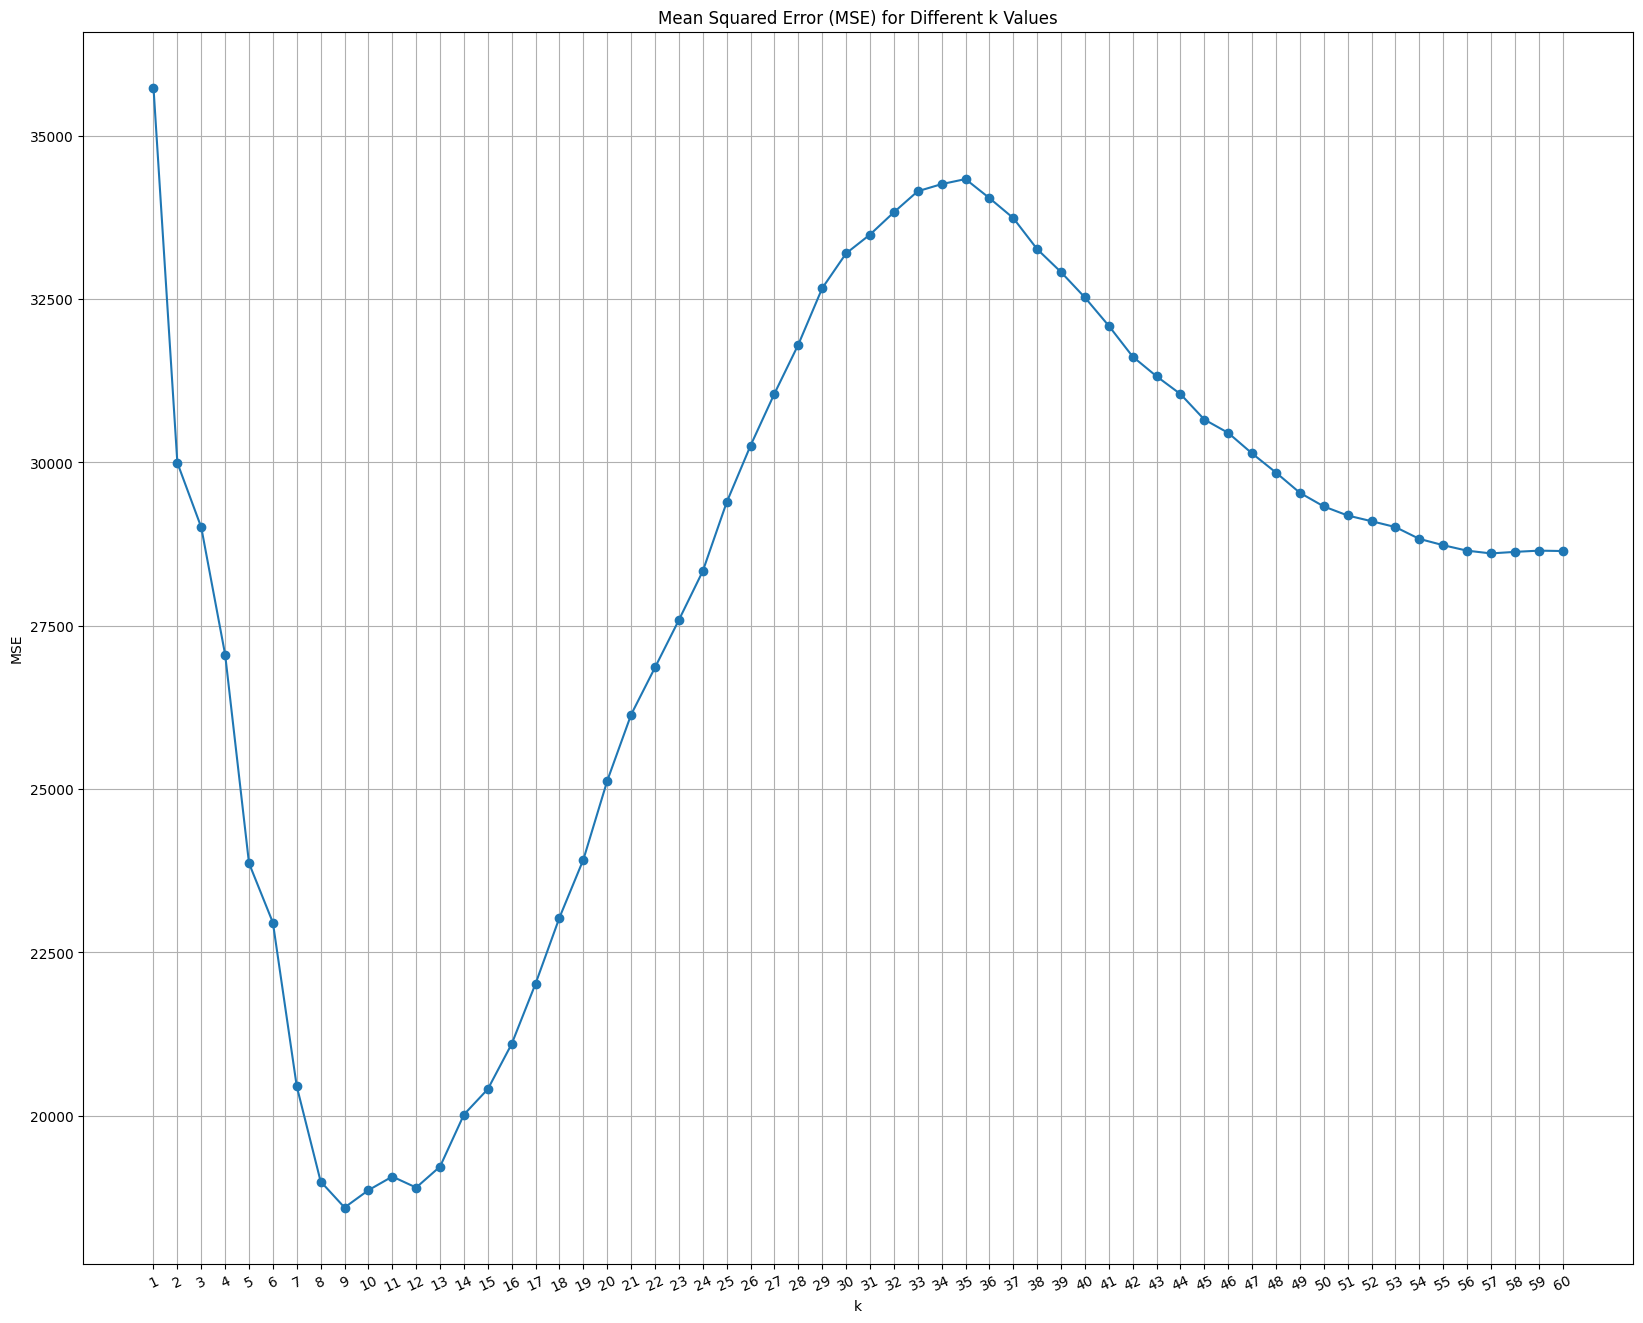

In [56]:
#Experimenting the model performance
# Lists to store performance metrics
mse_values = []

# Experimenting with different values of k
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(train_x, train_y)
    y_pred = knn.predict(test_x)
    mse = mean_squared_error(test_y, y_pred)
    mse_values.append(mse)

# Plotting MSE values for different k values
plt.figure(figsize=(20, 16))
plt.plot(k_values, mse_values, marker='o', linestyle='-')
plt.title('Mean Squared Error (MSE) for Different k Values')
plt.xlabel('k')
plt.ylabel('MSE')
plt.xticks(k_values)
plt.grid(True)
plt.xticks(rotation=25)
plt.show()



K-value with the least mean square error is  K=9 followeb by K=10 and the K-value with the highest mean square error is K=1 followed by k= 35

In [58]:
#Choosing the best k value
# Perform cross-validation for each k
mse_scores = []
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    # Perform 5-fold cross-validation and compute MSE
    scores = -1 * cross_val_score(knn, x_scaled, y, cv=5, scoring='neg_mean_squared_error')
    mse_scores.append(scores.mean())

# Find the best k based on the lowest MSE
best_k = k_values[np.argmin(mse_scores)]
print(f"The best value of k is: {best_k}")


The best value of k is: 11


**Additional Questions:**

In [ ]:
!pip install shap
!pip install scikit-learn

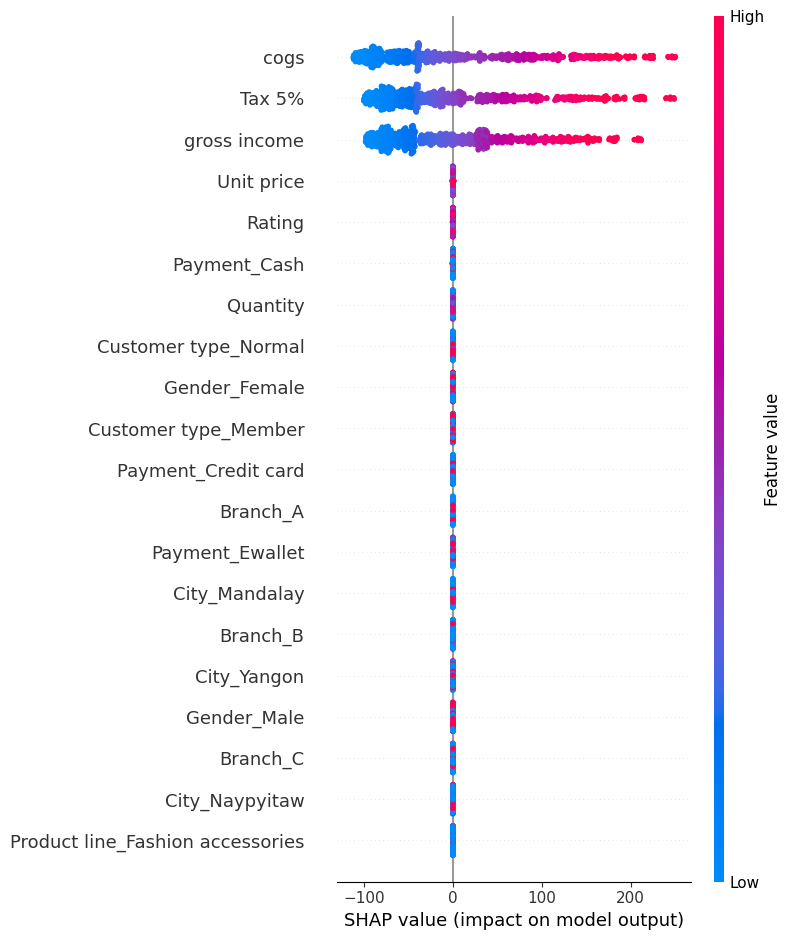

In [87]:
#features have the most impact on the 'Total' sales amount
explainer = shap.Explainer(model)
shap_values = explainer(x)
shap.summary_plot(shap_values, x)



	Cogs has most impact on the 'Total' sales amount

**How does the choice of k affect the model's predictive performance?**


* **Smaller 'k' :** Lower 'k' can lead to low bias but high variance and also result in higher computational complexity during prediction since they involve more calculations for nearest neighbors. When it comes to decision boundaries might be more complex and jagged, fitting closely around individual data points.

*  **Larger 'k':**: Higher 'k' values tend to have higher bias but lower variance and it  might be computationally less intensive but might lack granularity in predictions.When it comes to decision boundaries tend to be smoother and more generalized.
